<a href="https://colab.research.google.com/github/karenyxwang/Machine_Learning/blob/master/Project%202%20-%20LendingClub%20Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the Data 
Keep this if you are working in Google Colab. Delete this if you are working on your own computer and have the data downloaded already. 

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3' -O lendingclub.csv

--2020-02-10 03:34:04--  https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3
Resolving docs.google.com (docs.google.com)... 172.217.214.113, 172.217.214.102, 172.217.214.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f572fqpvfs1980r71ajirnfln3c45bgf/1581305400000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download [following]
--2020-02-10 03:34:04--  https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f572fqpvfs1980r71ajirnfln3c45bgf/1581305400000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download
Resolving doc-10-5c-docs.googleusercontent.com (doc-10-5c-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting

# Homework 2 (Due February 9, 2020)
Last week you trained a machine learning classifier to predict borrower success rates on LendingClub.com, using a set of features that were already present in the dataset. This week you will spend time optimizing that model.

Feel free to reuse code from your first homework submission; this does not need to be done from scratch.

# Question 1

Choose **ONE** of the following three options:

   - The `state` column is currently broken into 51 distinct values. Create a new feature, `region`, that groups similar states together.
   - The `emp_length` column is currently a nominal value. Create a new feature, `emp_length_numeric`, that treats the variable as a numeric value instead.
   - The `title` column is a free-form string and is currently hard or impossible to use as a feature. Define one or more features that capture information about the type of loan being applied for, based on the contents of the title.

For the option you have chosen, compare how switching to your new feature in a decision tree model improves or worsens performance compared to using the original representation. Report your quantitative results along with an explanation of your new feature's possible values.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GroupKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

lendingclub = pd.read_csv("lendingclub.csv")
lendingclub

,amount,date,title,fico,dti,zip,state,emp_length,policy_code,year,outcome
0,2500.0,Dec-2011,bike,740.0,1.00,309xx,GA,< 1 year,1.0,2011,accept
1,12000.0,Dec-2011,Consolidation,675.0,10.78,913xx,CA,10+ years,1.0,2011,accept
2,21000.0,Dec-2011,Debt Cleanup,705.0,13.22,335xx,FL,10+ years,1.0,2011,accept
3,31825.0,Dec-2011,Debt Consolidation Loan,760.0,14.03,080xx,NJ,5 years,1.0,2011,accept
4,12000.0,Dec-2011,Debt Consolidation,725.0,16.70,088xx,NJ,10+ years,1.0,2011,accept
...,...,...,...,...,...,...,...,...,...,...,...
81098,2000.0,2012-12-31,other,615.0,56.33,365xx,AL,< 1 year,0.0,2012,reject
81099,2000.0,2012-12-31,car,572.0,16.90,363xx,AL,< 1 year,0.0,2012,reject
81100,35000.0,2012-12-31,debt_consolidation,556.0,21.44,347xx,FL,< 1 year,0.0,2012,reject
81101,25000.0,2012-12-31,other,506.0,12.99,404xx,KY,< 1 year,0.0,2012,reject


The original model is as follows.

Its features include amount (amount requested for their first loan), fico (credit rating of the borrower), dti (ratio of the borrower’s total monthly debt payments), state (U.S. state that the borrower resides in), and emp_length (length of time that the borrower has been employed at their current job). Among the features, 'state' and 'emp_length' are nominal values, and the rest are numerical values.

The accuracy of the original model on the train set is 96.1, on the test set is 95.9.

In [ ]:
# List the features from the data
features = ["amount", "fico", "dti", "state", "emp_length"]

# Prepare our dataset
X = lendingclub.loc[:, features]
X = pd.get_dummies(X)
y = lendingclub["outcome"]

# Use scikit-learn to create train/test split and train the decision tree
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)
model = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.0001, min_samples_split=20, random_state=123).fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate and display accuracy on the train and test sets
train_accuracy = 100*accuracy_score(y_train, train_pred)
test_accuracy = 100*accuracy_score(y_test, test_pred)
print(f"Accuracy on the train set: {train_accuracy:.1f}")
print(f"Accuracy on the test set: {test_accuracy:.1f}")

Accuracy on the train set: 96.1
Accuracy on the test set: 95.9


The new column, region, is created to divide states into 5 regions based on their GDP in 2018. The classification method is quantile.

States with GDP in the top 20 percentile include CA, TX, NY, FL, IL, PA, OH, NJ, GA, MA, WA.

States with GDP in the 20-40 percentile include NC, VA, MI, MD, CO, MN, IN, TN, AZ, WI.

States with GDP in the 40-60 percentile include MO, CT, LA, OR, SC, AL, KY, OK, IA, UT.

States with GDP in the 60-80 percentile include NV, KS, DC, AR, NE, MS, NM, HI, NH, WV.

States with GDP in the last 20 percentile include ID, DE, ME, RI, ND, AK, SD, MT, WY, VT.

The new model replaces the 'state' feature in the old model with 'region'. The rest remains the same.

The accuracy of the new model on the train set is 96.1, on the test set is 95.9. The model performance stayed the same.

In [ ]:
# Create function for creating new column, region
def region_column(row):
    if row['state'] in (['CA', 'TX', 'NY', 'FL', 'IL', 'PA', 'OH', 'NJ', 'GA', 'MA', 'WA']):
        val = "gdp_20_percentile"
    elif row['state'] in (['NC', 'VA', 'MI', 'MD', 'CO', 'MN', 'IN', 'TN', 'AZ', 'WI']):
        val = "gdp_40_percentile"
    elif row['state'] in (['MO', 'CT', 'LA', 'OR', 'SC', 'AL', 'KY', 'OK', 'IA', 'UT']):
        val = "gdp_60_percentile"
    elif row['state'] in (['NV', 'KS', 'DC', 'AR', 'NE', 'MS', 'NM', 'HI', 'NH', 'WV']):
        val = "gdp_80_percentile"
    elif row['state'] in (['ID', 'DE', 'ME', 'RI', 'ND', 'AK', 'SD', 'MT', 'WY', 'VT']):
        val = "gdp_100_percentile"
    return val

# Create new column, region
lendingclub['region'] = lendingclub.apply(region_column, axis=1)

# List the features from the data
features = ["amount", "fico", "dti", "region", "emp_length"]

# Prepare our dataset
X = lendingclub.loc[:, features]
X = pd.get_dummies(X)
y = lendingclub["outcome"]

# Use scikit-learn to create train/test split and train the decision tree
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)
model = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.0001, min_samples_split=20, random_state=123).fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate and display accuracy on the train and test sets
train_accuracy = 100*accuracy_score(y_train, train_pred)
test_accuracy = 100*accuracy_score(y_test, test_pred)
print(f"Accuracy on the train set: {train_accuracy:.1f}")
print(f"Accuracy on the test set: {test_accuracy:.1f}")

Accuracy on the train set: 96.1
Accuracy on the test set: 95.9


The new column, emp_length_numeric, is created to transform the emp_length column from nominal value to numeric value.

The values in the new column, emp_length_numeric, include [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], which respectively replaced ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'] in the old column, emp_length.

The new model replaces the 'emp_length' feature in the old model with 'emp_length_numeric'. The rest remains the same.

The accuracy of the new model on the train set is 95.8, on the test set is 95.6. The model performance dropped slightly.



In [ ]:
# Create function for creating new column, emp_length_numeric
def emp_length_numeric_column(row):
    if row['emp_length'] == '< 1 year':
        val = 0.5
    elif row['emp_length'] == '1 year':
        val = 1
    elif row['emp_length'] == '2 years':
        val = 2
    elif row['emp_length'] == '3 years':
        val = 3
    elif row['emp_length'] == '4 years':
        val = 4
    elif row['emp_length'] == '5 years':
        val = 5
    elif row['emp_length'] == '6 years':
        val = 6
    elif row['emp_length'] == '7 years':
        val = 7
    elif row['emp_length'] == '8 years':
        val = 8
    elif row['emp_length'] == '9 years':
        val = 9
    elif row['emp_length'] == '10+ years':
        val = 10
    return val

# Creating new column emp_length_numeric
lendingclub['emp_length_numeric'] = lendingclub.apply(emp_length_numeric_column, axis=1)

# List the features from the data
features = ["amount", "fico", "dti", "state", "emp_length_numeric"]

# Prepare our dataset
X = lendingclub.loc[:, features]
X = pd.get_dummies(X)
y = lendingclub["outcome"]

# Use scikit-learn to create train/test split and train the decision tree
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)
model = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.0001, min_samples_split=20, random_state=123).fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate and display accuracy on the train and test sets
train_accuracy = 100*accuracy_score(y_train, train_pred)
test_accuracy = 100*accuracy_score(y_test, test_pred)
print(f"Accuracy on the train set: {train_accuracy:.1f}")
print(f"Accuracy on the test set: {test_accuracy:.1f}")

Accuracy on the train set: 95.8
Accuracy on the test set: 95.6


The new column, title_length, is created to measure the length of the titles. The rationale is that the longer the title, the more it shows that the loan borrower is more serious about his/her loan and is willing to explain the loan usage in detail.

The value of the new column varies from a mininum of 1 to a maximum of 908. However, the majority of the lengths of titles (75%) was below 18 words. The mean is 13.5, meaning that, on average, loan borrowers are willing to use 13-14 words to describe their purpose.

In [ ]:
# Create function for creating new column, title_length
def title_length_column(row):
    val = len(row['title'])
    return val

# Create new column, title length, and describe the column
lendingclub['title_length'] = lendingclub.apply(title_length_column, axis=1)
lendingclub['title_length'].describe()

count    81103.000000
mean        13.505123
std          8.979191
min          1.000000
25%          7.000000
50%         14.000000
75%         18.000000
max        908.000000
Name: title_length, dtype: float64

The new model adds the feature 'title_length'. The rest remains the same.

The accuracy of the new model on the train set is 96.1, on the test set is 95.9. The model performance stayed the same with the original model.

In [ ]:
# List the features from the data
features = ['title_length', "amount", "fico", "dti", "state", "emp_length"]

# Prepare our dataset
X = lendingclub.loc[:, features]
X = pd.get_dummies(X)
y = lendingclub["outcome"]

# Use scikit-learn to create train/test split and train the decision tree
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)
model = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.0001, min_samples_split=20, random_state=123).fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate and display accuracy on the train and test sets
train_accuracy = 100*accuracy_score(y_train, train_pred)
test_accuracy = 100*accuracy_score(y_test, test_pred)
print(f"Accuracy on the train set: {train_accuracy:.1f}")
print(f"Accuracy on the test set: {test_accuracy:.1f}")

Accuracy on the train set: 96.1
Accuracy on the test set: 95.9


# Question 2

Choose **THREE** of the following five options:
1. Amount of data available for training.
2. Subset of features included in the model.
3. Decision tree vs. logistic regression classification.
4. Hyperparameter tuning for the best-performing model from option 3.
5. Number of folds or stratification strategy for cross-validation.

For each option you choose, write code to see how much impact that option has on model performance. For instance, you might choose to measure prediction accuracy as the amount of available data is increased from 1% of the total training set to 100%.

Note that for logistic regression classification, the default decision boundary may not produce the best model; you will likely want to check different decision boundaries if you choose options 3 and 4.

Rank the three options you chose from the greatest impact on model performance to the least impact. Justify your ranking, based on specific quantitative experimental evidence.

**I did question 3 and 4 for extra credit. If there are too many mistakes for these two questions. Please prioritize question 1, 2, 5 when grading.**

1.Amount of data available for training:

In this part I adjusted the size of the lendingclub dataset and calculated how model accuracy varies with different sized data sets. The results show that testing accuracy increases, from as low as 87.38 to as high as more than 96, as the size of the dataset increases from 0 to 80000.

In [ ]:
size = []
train_accuracies = []
test_accuracies = []
accuracies_table = pd.DataFrame()

# Select features
features = ["amount", "fico", "dti", "state", "emp_length"]

# Calculate accuracy of the model for different sized data sets
for i in range(100):

    # Prepare the small dataset
    lendingclub_small = lendingclub.iloc[lendingclub.index % 100 <= i]
    X = lendingclub_small.loc[:, features]
    X = pd.get_dummies(X)
    y = lendingclub_small["outcome"]

    # Use scikit-learn to create train/test split and train the decision tree
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)
    model = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.0001, min_samples_split=20, random_state=123).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Caluclate accuracy
    train_accuracy = 100*accuracy_score(y_train, train_pred)
    test_accuracy = 100*accuracy_score(y_test, test_pred)

    size.append(str(i+1) + '%')
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Produce the result in a table
accuracies_table['size'] = size
accuracies_table['train_accuracy'] = train_accuracies
accuracies_table['test_accuracy'] = test_accuracies
accuracies_table

,size,train_accuracy,test_accuracy
0,1%,95.377504,91.411043
1,2%,94.919169,87.384615
2,3%,96.560575,92.008197
3,4%,96.264921,91.692308
4,5%,96.241528,91.502463
...,...,...,...
95,96%,96.318654,95.960699
96,97%,96.130990,95.455701
97,98%,95.947094,95.646977
98,99%,96.257375,96.120555


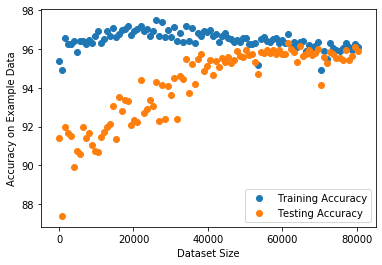

In [ ]:
# Plot the results
ax = plt.gca()
x_index = [x * (len(lendingclub)/100) for x in range(100)]
ax.scatter(x_index, train_accuracies)
ax.scatter(x_index, test_accuracies)
plt.ylabelbest = 0
plt.ylabel("Accuracy on Example Data")
plt.xlabel("Dataset Size")
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.show()

2.Subset of features included in the model:

In this part I divided all features to three categories. Finanical features include fico (credit rating of the borrower), dti (ratio of the borrower’s total monthly debt payments), and emp_length (length of time that the borrower has been employed at their current job). Location features include state (U.S. state that the borrower resides in. Loan features include amount (amount requested for their first loan). Then I categorized these features into seven feature sets, including finanical features only, location features only, loan only, finanical and location features, finanical and loan features, location and loan features, and all features.

I produced the results in a table. I considered putting them into a plot - but the x axis couldn't fit that many feature names. The result shows that the best feature sets are "financial only" feature and "financial and location" feature with 96.5% accuracy. The second best feature sets are "financial and loan" feature and "all features" feature with 95.9% accuracy. The worst feature set is "location only" dataset with 88.5% accuracy.

In [ ]:
# Create lists of possible features
financial_features = ["fico", "dti", "emp_length"]
location_features = ["state"]
loan_features = ["amount"]

feature_sets = {
    "financial only": financial_features,
    "location only": location_features,
    "loan only": loan_features,
    "financial and location": financial_features + location_features,
    "financial and loan": financial_features + loan_features,
    "location and loan": location_features + loan_features,
    "all features": financial_features + location_features + loan_features
}

best = 0
best_name = None
feature_set_names = []
feature_set_accuracies = []
features_accuracies_table = pd.DataFrame()

# Calculate accuracies of the model with different features
for set_name, feature_set in feature_sets.items():

    # Prepare the small dataset
    X = lendingclub.loc[:, feature_set]
    X = pd.get_dummies(X)
    y = lendingclub["outcome"]

    # Use scikit-learn to create train/test split and train the decision tree
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)
    model = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.0001, min_samples_split=20, random_state=123).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calcualte accuracy
    accuracy = 100*accuracy_score(test_pred, y_test)
    if accuracy >= best:
        best = accuracy
        best_name = set_name
    
    feature_set_names.append(set_name)
    feature_set_accuracies.append(accuracy)

# Produce results in a table
features_accuracies_table['feature_set_names'] = feature_set_names
features_accuracies_table['feature_set_accuracies'] = feature_set_accuracies
features_accuracies_table = features_accuracies_table.sort_values(by=['feature_set_accuracies'], ascending = False).reset_index(drop = True)
features_accuracies_table

,feature_set_names,feature_set_accuracies
0,financial only,96.529191
1,financial and location,96.523026
2,financial and loan,95.931200
3,all features,95.912706
4,loan only,89.248505
5,location and loan,89.211516
6,location only,88.459404


3.Decision tree vs. logistic regression classification.

In this part, I trained logistic regression classfication and calculated its accuracies based on different threshold. Due to the imbalance of dataset (there are a lot more "reject" than "accept" in the outcome), the threshold of the logistic regression is far above 0.5. I found that the higher the threshold, the more accurate the model is. According to my calculation, the model achieves the highest accuracy of 88.2 with a 0.098 threshold. It shows that the accuracy of the logistic regression model (88.2) is less than the accuracy of the original decision tree model (95.9).

In [ ]:
# List the features from the data
features = ["amount", "fico", "dti", "state", "emp_length"]

# Prepare data
X = lendingclub.loc[:, features]
X = pd.get_dummies(X)
y = lendingclub["outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)

# Train logistic regression model using scikit-learn
model = LogisticRegression(penalty="elasticnet", C=1, l1_ratio=0.5, solver="saga", max_iter=5000, random_state=123)
model.fit(X_train, y_train)

# Get prediction probabilities on the test set
predicts = model.predict_proba(X_test)
all_probabilities = [x[1] for x in predicts]
all_actuals = list(y_test)

# Compute accuracies based on several different thresholds
for threshold in np.arange(0.9, 0.99, 0.01):
    all_predictions = []
    for x in all_probabilities:
      if x > threshold:
        all_predictions.append('accept')
      else:
        all_predictions.append('reject')
    accuracy = 100*accuracy_score(all_actuals, all_predictions)
    print(f"Accuracy: {accuracy:.1f} at threshold {threshold}")

Accuracy: 67.9 at threshold 0.9
Accuracy: 71.1 at threshold 0.91
Accuracy: 73.8 at threshold 0.92
Accuracy: 77.4 at threshold 0.93
Accuracy: 80.2 at threshold 0.9400000000000001
Accuracy: 83.8 at threshold 0.9500000000000001
Accuracy: 88.0 at threshold 0.9600000000000001
Accuracy: 88.2 at threshold 0.9700000000000001
Accuracy: 88.2 at threshold 0.9800000000000001


4.Hyperparameter tuning for the best-performing model from option 3.

The best-performing model from option 3 is decision tree. Therefore I'm tuning the hyperparameter for the decision tree classifier, including criterion, min_impurity_decrease, and min_samples_split. The number of folds for cross validation in the hyperparameter search is 5. The result shows that the best model has a 95.9% accuracy on the test set, which is the same as the original model.

In [ ]:
# Select features
features = ["amount", "fico", "dti", "state", "emp_length"]

# Prepare the data
X = lendingclub.loc[:, features]
X = pd.get_dummies(X)
y = lendingclub["outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)

# Decide on the hyperparameters we would like to compare
hyperparameters = {
    "criterion":["gini", "entropy"],
    "min_impurity_decrease":[0, 0.0001, 0.001],
    "min_samples_split":range(2, 20, 2)
}

# Decide on number of folds for cross validation in the hyerparameter search
kfolds = 5

# Initialize a search using cross validation in sklearn
search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),
                            param_grid=hyperparameters, cv=kfolds, scoring="accuracy")

# Train a classifier with each combination of hyperparameters and take the best one and print out the results
classifier = search.fit(X_train, y_train)
accuracy = classifier.best_score_
best_fit = classifier.best_estimator_
print(f"Best fit when training was {best_fit}\nWith {100*accuracy:.1f}% accuracy.")

# Evaluate our best model's performance on the test set and print the results
y_pred = classifier.predict(X_test)
accuracy = 100*accuracy_score(y_test, y_pred)
print(f"Accuracy on held-out test set: {accuracy:.1f}%")


Best fit when training was DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
With 95.4% accuracy.
Accuracy on held-out test set: 95.9%


5.Number of folds or stratification strategy for cross-validation.

In this part, I calculated accuracies based on different number of folds for cross-validation and displayed the results in a table and a plot. The results show that the model accuracy is the highest with 0 fold and the lowest with 5 fold.

In [ ]:
# List the features from the data
features = ["amount", "fico", "dti", "state", "emp_length"]

# Set up dataset and cross validation split
X = lendingclub.loc[:, features]
X = pd.get_dummies(X)
y = lendingclub["outcome"]

num_folds = 10

# Set up model
classifier = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.0001, min_samples_split=20, random_state=123).fit(X_train, y_train)

accuracies = pd.DataFrame()
fold = []
train_accuracies = []
test_accuracies = []

# Calculate accuracies of the model based on different cross validation split
for i in range(num_folds):
    X_train = X.loc[X.index % num_folds != i]
    X_test = X.loc[X.index % num_folds == i]
    y_train = y.loc[y.index % num_folds != i]
    y_test = y.loc[y.index % num_folds == i]
    
    model = classifier.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_accuracy = 100*accuracy_score(y_train, train_pred)
    test_accuracy = 100*accuracy_score(y_test, test_pred)

    fold.append(i)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

accuracies['fold'] = fold
accuracies['train accuracies'] = train_accuracies
accuracies['test accuracies'] = test_accuracies

accuracies = accuracies.sort_values(by = 'test accuracies', ascending = False).reset_index(drop = True)
accuracies

,fold,train accuracies,test accuracies
0,0,96.303705,96.498582
1,2,96.188623,96.202688
2,9,96.187306,96.128237
3,8,96.168126,96.115906
4,7,96.214706,96.029593
5,6,95.874947,95.869297
6,1,96.173553,95.795833
7,3,96.092776,95.733662
8,4,95.973587,95.610358
9,5,95.970847,95.548705


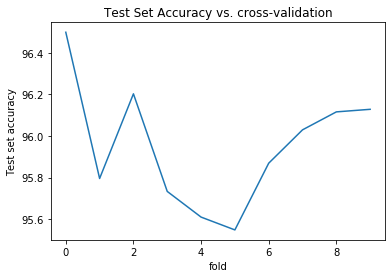

In [ ]:
# Plot the relation between test accuracy and cross validation split
plt.title('Test Set Accuracy vs. cross-validation')
plt.plot(range(num_folds), test_accuracies)
plt.xlabel("fold")
plt.ylabel("Test set accuracy")
plt.show()

My ranking from the greatest impact to the least impact on model performace is:

1. Amount of data available for training.
2. Decision tree vs. logistic regression classification.
3. Subset of features included in the model.
4. Number of folds or stratification strategy for cross-validation.
5. Hyperparameter tuning for the best-performing model from option 3.

I made this ranking based on how much differences in accuracy score the change has created. The change in the amount of data created the largest drop in accuracy score from 95.9 to 87.38 when the size of the data becomes really small.

Logistic regression ranks the second because its best model only has a 88.2 accuracy score. Its non-best models are even more inaccurate compared to the decision tree model. Therefore logistic regression has a huge impact on the accuracy score second only to the size of data. 

Features ranks the third because the feature set with the worst performance only achieved an accuracy score of 88.46, which is higher than the accuracy scores after the first two changes but is also very significant. Number of folds for cross-validation ranks the fourth because its model with the worst performance still has a 95.55 accuracy score, which is not much different with the original model (95.9). Finally, hyperparameter tuning for the decision tree model ranks the last because it has the same accuracy score as the original model.

# Question 3

Report the best-performing model and the total set of choices that you made in the options above to get to that level of performance. Compare that model performance to the result you reported in Homework 1. 

   - Describe one hypothetical business context for LendingClub where the amount of improvement reported in Question 3 would be worth the extra time and effort needed for optimization.
   - Describe one hypothetical business context where the improvement would **not** have been worth the extra time and effort.

The best model is achieved using only the financial features ("fico", "dti", "emp_length") while the number of fold is 0.

The accuracy score of the best model is 96.77.

In [ ]:
# List the features from the data
features = ["fico", "dti", "emp_length"]

# Set up dataset and cross validation split
X = lendingclub.loc[:, features]
X = pd.get_dummies(X)
y = lendingclub["outcome"]

num_folds = 10

# Set up model
classifier = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.0001, min_samples_split=20, random_state=123).fit(X_train, y_train)

accuracies = pd.DataFrame()
fold = []
train_accuracies = []
test_accuracies = []

# Calculate accuracies of the model based on different cross validation split
for i in range(num_folds):
    X_train = X.loc[X.index % num_folds != i]
    X_test = X.loc[X.index % num_folds == i]
    y_train = y.loc[y.index % num_folds != i]
    y_test = y.loc[y.index % num_folds == i]
    
    model = classifier.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_accuracy = 100*accuracy_score(y_train, train_pred)
    test_accuracy = 100*accuracy_score(y_test, test_pred)

    fold.append(i)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

accuracies['fold'] = fold
accuracies['train accuracies'] = train_accuracies
accuracies['test accuracies'] = test_accuracies

accuracies = accuracies.sort_values(by = 'test accuracies', ascending = False).reset_index(drop = True)
accuracies

,fold,train accuracies,test accuracies
0,0,96.524277,96.769819
1,8,96.507884,96.609125
2,9,96.499664,96.510481
3,1,96.574967,96.473924
4,5,96.672284,96.473490
5,7,96.533914,96.411837
6,3,96.521584,96.362515
7,2,96.509206,96.350635
8,6,96.325675,96.325524
9,4,96.555834,96.202219


The accuracy score of the best model (96.77%) improved slightly compared to the original model (95.9%).

The optimization is worth it when the costs of wrong prediction is very high. For example, the company could use the model to decide whether to provide service to a loan borrower. If the company is still at the startup stage, where every customer is very valuable and losing one customer could bring a huge loss to the company, then it is necessary for the company to improve the accuracy of the model, even just slightly. 

The optimization is not worth the time and effort when the costs of wrong prediction is relatively low. For example, if the company is already a large-scale developed company and it has a lot of customers, losing one customer due to wrong prediction will not cause much damage to the company. In this case, a lot of efforts made for a slight improvement in the accuracy of the model is not that necessary.

# Extra Credit

For up to 2 points of extra credit, complete all three of the analyses in Question 1.

For up to 4 points of extra credit, complete all five of the analyses in Question 2.

# Scoring Rubric
![](https://drive.google.com/uc?export=view&id=1dLF4RcciHT_giZEXWio1D0hwK73tKYjK)

![](https://drive.google.com/uc?export=view&id=1nYN7X847FeHtE-0LVpqhQk8iq2YEWx2d)